#                                                    DATA - 601 
#                             Report:  Analyse the Customer Behaviour On E-Commerce Platforms



# Introduction

The retail landscape has undergone a profound transformation over the past decade. Traditional stores have been supplemented and in the majority of cases replaced by online storefronts also known as e-commerce platforms. E-commerce platforms have redefined the way people shop offering variety, convenience, and accessibility. In just a matter of the last two years e-commerce sales increased by 67.5% in the Canadian retail market alone [3]. As the customer demand for more convenient ways of shopping increases, understanding their behavior becomes an essential paramount for businesses to thrive. Thus, the aim of our project is to analyze customer behavior on e-commerce platforms for the sake of customer retention and for the significant growth in ecommerce business. As the use of e-commerce continues to evolve, it becomes important for businesses to conduct strategic methods to understand customer behavior to target and enhance customer experience ultimately correlating with higher sales.

The primary objective of our project is to analyze and understand attributes and factors that influence customer behavior on e-commerce platforms. The analysis will provide valuable and explicit information regarding customer behavior on e-commerce which is an important insight that businesses can use to improve their services and enhance customer satisfaction.


# Dataset

The dataset selected for undertaking our objective of diving deeper into online customer behavior is a comprehensive collection of customer interactions and purchasing patterns within the leading e-commerce ecosystem [6]. The initial purpose of the author was to find out which customers would churn. Customers who churn, in this context, refers to customers who do not return to the respective e-commerce platform. In essence, the author’s intention with their dataset is similar to our objective. 

This dataset offers a structured and tabular format. It is organized into rows and columns, making it suitable for traditional analysis techniques. Each row represents a unique customer interaction and activity with respect to the e-commerce platform, while each column represents a specific attribute or variable associated with those interactions. It is worth mentioning that there are some missing values which will be explained in more detail in the data cleaning section of the task section. 
This dataset has 5360 unique values collected from 2019, that is 5360 unique customer interactions, and 20 columns. Each column provides crucial information that can be used for analysis.

It is important to note that this dataset was initially found through Kaggle[7]. However, this data was collected directly through creativecommon.org with proper permissions and attributions followed. Proper attribution to the original source and contributor is provided to adhere to ethical and legal considerations[6]. (CC BY-NC-SA 4.0)



# Importing Important Libraries



In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1. Data Import and understanding

Then we load the data from "E comm" sheet of excel file using pd.read_excel().Running head gives us a peek of our dataset. Although this doesn’t really tell us much about our data besides showing us how the data looks like.

In [28]:
#Data import and understanding
customer_behaviour_df = pd.read_excel("E Commerce Dataset.xlsx",sheet_name='E Comm')
customer_behaviour_df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


Calling "info()" on our dataset tells us tons of information about our data frame like the shape (rows, columns), the data type of our features, and the memory usage.

In [29]:
customer_behaviour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

"nunique()" is a method in the pandas library, which is a popular data manipulation and analysis library for Python. It is used to determine the number of unique (distinct) elements in a pandas object, such as a Series or a DataFrame column.

In [30]:
#get the count unique values in each column 
customer_behaviour_df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

"dtypes" expression is used in Python with the pandas library to display the data types of each column in a pandas DataFrame

In [31]:
#check datatype of each column
print("Column datatypes : ")
print(customer_behaviour_df.dtypes)

Column datatypes : 
CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object


By exploring the dataset, we now have a general idea of our dataset and the datatypes.

# Part 2: Data Cleaning

According the Wikipedia, Data Cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data[9].
From this definition, we can say that the aspects of clean data are: Complete ,Correct ,Accurate, and Relevant.

Importance: Data cleaning is a crucial step in the data science pipeline as the insights and results you produce is only as good as the data you have. As the old adage goes — garbage in, garbage out.
Using dirty data to produce analysis will result in erroneous predictions that engenders bad decisions and dangerous outcomes

Steps we have followed to clean the data is as follows:

## 2.1 Drop data that are not useful for Analysis
To begin, we decided to drop certain features or columns from our dataset. Now, this isn't a recommended practice because it leads to loss of valuable information. However, in our case, we were certain that some columns held no relevance for our analysis. By removing them upfront, before diving into other cleaning methods like filling in missing values, we managed to save a significant amount of time and effort.

In [32]:
#Dropping the columns which are not used in the analysis
customer_behaviour_df.drop(columns = ["CustomerID","CityTier","WarehouseToHome","NumberOfAddress","OrderAmountHikeFromlastYear"],inplace= True)
customer_behaviour_df.head()

,Churn,Tenure,PreferredLoginDevice,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,1,1.0,1.0,5.0,159.93
1,1,NaN,Phone,UPI,Male,3.0,4,Mobile,3,Single,1,0.0,1.0,0.0,120.90
2,1,NaN,Phone,Debit Card,Male,2.0,4,Mobile,3,Single,1,0.0,1.0,3.0,120.28
3,1,0.0,Phone,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,CC,Male,NaN,3,Mobile,5,Single,0,1.0,1.0,3.0,129.60


It is always a good idea to store the column names and keep it handy for further usage

In [33]:
#get list of columns
customer_behaviour_columns = list(customer_behaviour_df.columns)
customer_behaviour_columns

['Churn',
 'Tenure',
 'PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'Complain',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

Identifying the number of Null values in each column is required for further cleaning process

In [34]:
#Examine the missing values...........
print("Missing values distribution: ")  
print(customer_behaviour_df.isnull().sum()) #no change needed

Missing values distribution: 
Churn                         0
Tenure                      264
PreferredLoginDevice          0
PreferredPaymentMode          0
Gender                        0
HourSpendOnApp              255
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
Complain                      0
CouponUsed                  256
OrderCount                  258
DaySinceLastOrder           307
CashbackAmount                0
dtype: int64


Next, we categorize our features into numerical and categorical types

## 2.2 Cleaning the categorical data
Moving on to cleaning the categorical data, our focus was on eliminating duplicates and refining unique values within categorical columns. For instance, in the 'Preferred Order Category' column, we found instances where 'Mobile' and 'Mobile Phone' essentially meant the same thing. We standardized this by replacing 'Mobile' with 'Mobile Phone', simplifying our data.

In [35]:
#select the categorical datatype columns
customer_behaviour_categorical = customer_behaviour_df.select_dtypes(include=["category","object"]).columns
print(customer_behaviour_categorical)

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')


When you apply the describe() method to categorical columns, it provides details about the total count, the number of unique values, and the category with the highest occurrence along with its frequency.

In [36]:
customer_behaviour_df[customer_behaviour_categorical].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


Understanding each category of every categorical column is important.Below code is written to get details of each category in all the categorical columns.

In [37]:
#showing the unique values in each categorical column 
print("\nCategorical Columns with the unique values and counts ")
for col in customer_behaviour_categorical:
    print("\n")#Remove the +col**********
    print(customer_behaviour_df[col].value_counts())



Categorical Columns with the unique values and counts 


PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64


PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64


Gender
Male      3384
Female    2246
Name: count, dtype: int64


PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64


In [38]:
#replacing duplicates in Preferred Order category
customer_behaviour_df["PreferedOrderCat"] = customer_behaviour_df["PreferedOrderCat"].replace("Mobile","Mobile Phone")

In [39]:
#In the Preferred Login Device Category, Mobile Phone and Phone are the same.So replacing Phone to Mobile Phone
customer_behaviour_df["PreferredLoginDevice"] = customer_behaviour_df["PreferredLoginDevice"].replace("Phone","Mobile Phone")

In [40]:
#replacing the duplicates in the PreferredPaymentMode
customer_behaviour_df["PreferredPaymentMode"] = customer_behaviour_df["PreferredPaymentMode"].replace({"CC":"Credit Card","COD":"Cash on Delivery"})

## 2.3 Cleaning numerical data types

Then came the task of cleaning numerical data types. This involved identifying missing values and replacing them based on the available data points, using either the mean or the median. To make an informed decision between the mean and median, we needed to understand the distribution of the data. This is where histograms came in handy. By studying the shape of the data, we determined its skewness. Ultimately, we chose the median to replace the missing values, ensuring our dataset was not only complete but also accurate and reliable.


In [41]:
#Numerical datatype columns
customer_behaviour_numerical = customer_behaviour_df.select_dtypes(include=["number"]).columns
print(customer_behaviour_numerical)

Index(['Churn', 'Tenure', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'Complain', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


In [42]:
customer_behaviour_df[customer_behaviour_numerical].describe()

,Churn,Tenure,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5375.000000,5630.000000,5630.000000,5630.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,2.931535,3.688988,3.066785,0.284902,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.721926,1.023999,1.380194,0.451408,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,3.000000,4.000000,3.000000,0.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,4.000000,4.000000,1.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,5.000000,6.000000,5.000000,1.000000,16.000000,16.000000,46.000000,324.990000


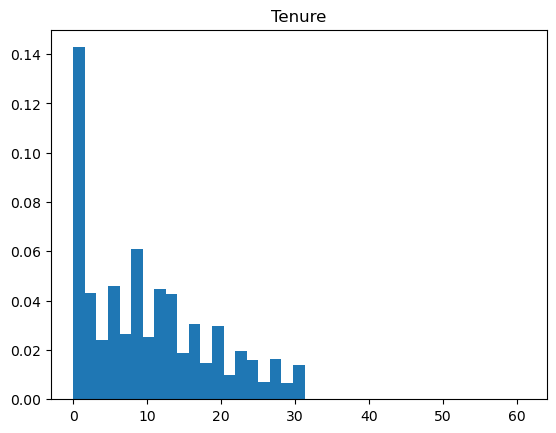

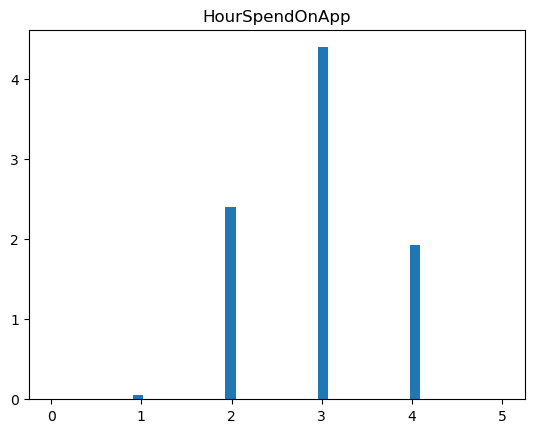

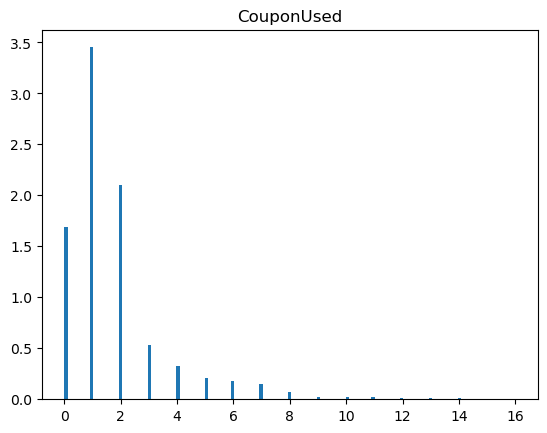

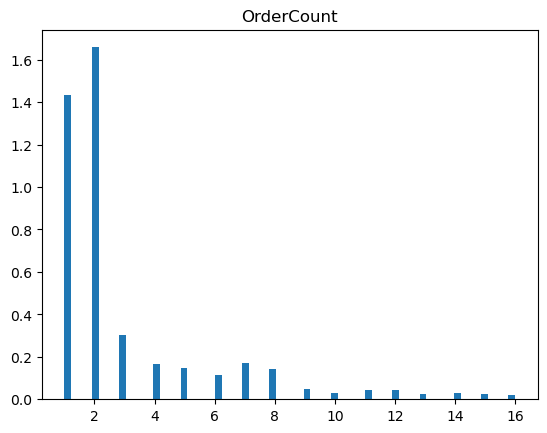

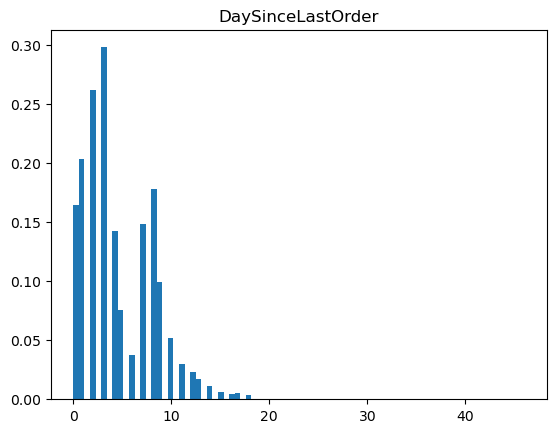

In [43]:
#understanding the distribution of Tenure,HoursSpendOnApp,CouponUsed ,OrderCount,DaySinceLastOrder to find what method to be used in fillna
for col in customer_behaviour_df[customer_behaviour_numerical]:
    if customer_behaviour_df[col].isnull().mean() > 0:
        plt.hist(customer_behaviour_df[col], bins='auto', density=True)
        plt.title(col)
        plt.show()

In [44]:
#fill na with medium values since the distribution is skewed distribution
for col in customer_behaviour_df[customer_behaviour_numerical]:
    if customer_behaviour_df[col].isnull().mean() > 0:
        customer_behaviour_df[col].fillna(customer_behaviour_df[col].median(), inplace=True)


In [45]:
#Retrieving the null value information after the cleaning
customer_behaviour_df.isnull().mean()

Churn                       0.0
Tenure                      0.0
PreferredLoginDevice        0.0
PreferredPaymentMode        0.0
Gender                      0.0
HourSpendOnApp              0.0
NumberOfDeviceRegistered    0.0
PreferedOrderCat            0.0
SatisfactionScore           0.0
MaritalStatus               0.0
Complain                    0.0
CouponUsed                  0.0
OrderCount                  0.0
DaySinceLastOrder           0.0
CashbackAmount              0.0
dtype: float64

# Part 3: Data Analysis and Visualization

 Dividing customer behavior in ecommerce into four main categories—
1. Customer Demographic and Preferences
2. Customer Behavior and Engagement
3. Customer Churn and Retention
4. Customer Satisfaction and Feedback

-provides a structured framework for understanding and analyzing different aspects of customer interactions with online businesses.

In Customer Demographic and Preferences analysis, businesses gather a wide range of information about their customers, including demographic details like age, gender. Behavioral data, including purchase history, frequency, and shopping preferences, is crucial for predicting customer behavior. Additionally, technographic details like preferred devices and social media usage, along with communication preferences, are collected.

In the context of customer behavior and engagement, businesses analyze preferred order categories, gender, marital status, purchase frequency, coupons, and cashbacks. Understanding these factors helps in tailoring marketing efforts and promotions, creating personalized experiences, and building customer loyalty. This analysis guides businesses in offering relevant products, targeted discounts, and incentives, ultimately enhancing customer satisfaction and fostering long-term relationships.

Customer churn involves customers discontinuing their relationship with a company, typically due to dissatisfaction or changing needs. Retention strategies aim to keep customers loyal by providing excellent service and personalized experiences. Analyzing churn patterns helps businesses identify reasons for customer attrition, enabling the implementation of effective retention tactics. Successful customer retention is vital for sustaining a loyal customer base and ensuring long-term business growth.

Customer satisfaction and feedback involve assessing how content customers are with a company's products or services. Satisfaction scores measure this contentment, often through ratings or surveys. Tenure ,complaint status examines feedback from long-term customers, highlighting ongoing issues. Both metrics are vital for businesses, enabling them to address concerns, enhance services, and foster lasting customer loyalty.

**Customer Demographic and Preferences**

It is a crucial for e-commerce business to analyze customer demograpghics and prefrences to understand how different types of customers behave when shopping online to make data-driven decisions. From this part of the analysis, we hope to create visualizations to understand the customer demographics and prefrences based on our guiding questions below.

**Question-1.1: To what extent does the time spent on the app relate to how frequently customers make purchases (Order count)?**

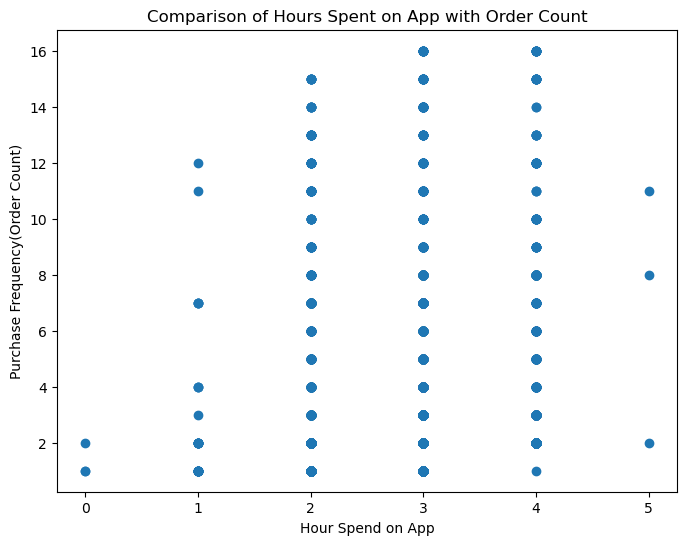

In [46]:
#does the time spent on the app relate to how frequently customers make purchases (Order count)
plt.figure(figsize=(8,6))
plt.scatter(y="OrderCount",x="HourSpendOnApp",data=customer_behaviour_df)
plt.title("Comparison of Hours Spent on App with Order Count")
plt.xlabel("Hour Spend on App")
plt.ylabel("Purchase Frequency(Order Count)")
plt.show()


From the scatterplot visualization alone, we observe a distribution of points that does not suggest strong or clear relationship between the hours spent on app and the purchase frequency. There is not a strong upward or downward trend. However, majority of the data points fall in between the 2 to 4 hours range for time spent and most of the order counts also varies in frequency. This indicates that while some users may place several orders with fewer hours on the app, others might spend a similar amount of time without reflecting the same purchasing behavior. From the scatterplot we can also infer that customers with similar hours spent on the app exhibit different purchasing patterns. Therefore, there may be other influencing factors that may that determine the order count as, the scatterplot does not support the notion that spending more time on the app correlates with an increase in number of orders. This assumption was made only based on the visualization and to provide a more concrete evidence a statistical test is necessary to either support or reject the inferences made above. 

**Question-1.2: Is there a notable difference between app usage and purchase frequency, and does this differ significantly between male and female customers?**

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

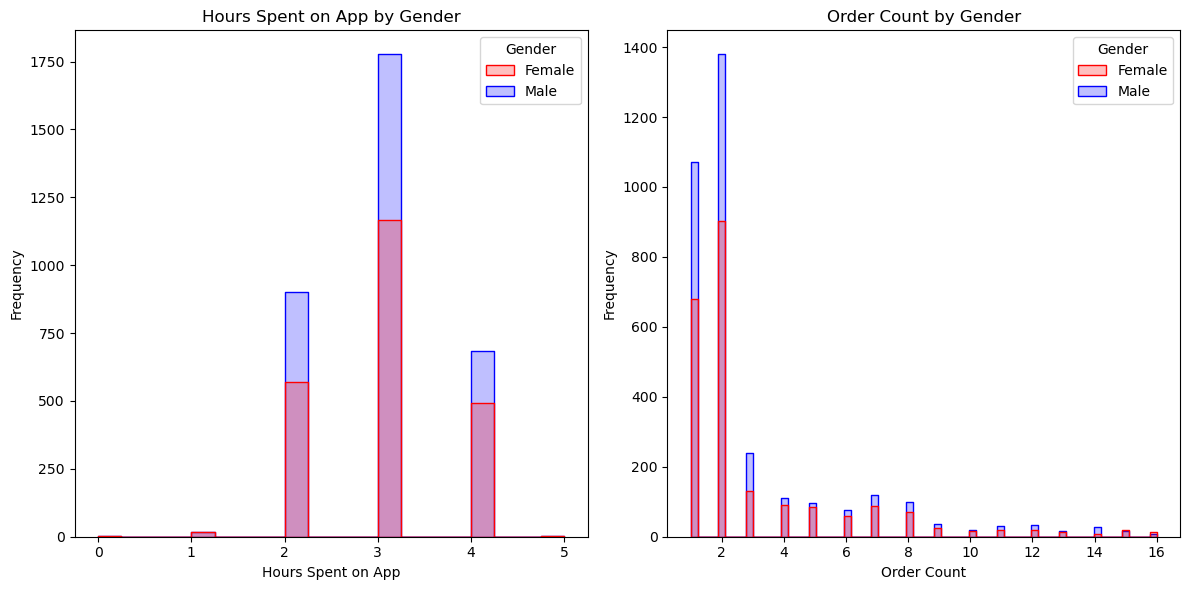

In [47]:
# Is there a notable difference between app usage and purchase frequency, and does this differ significantly between male and female customers?
# Filter relevant columns from the dataset
distplot_df = customer_behaviour_df[['HourSpendOnApp', 'OrderCount', 'Gender']]

# Create distribution plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=distplot_df, x='HourSpendOnApp', hue='Gender', element='step', palette={'Male': 'blue', 'Female': 'red'},bins=20)
plt.title('Hours Spent on App by Gender')
plt.xlabel('Hours Spent on App')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=distplot_df, x='OrderCount', hue='Gender', element='step', palette={'Male': 'blue', 'Female': 'red'})
plt.title('Order Count by Gender')
plt.xlabel('Order Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


From the stacked histogram on the left comparing the distribution of hour spend on the with genders, we observe that female are spending a little more time on the app usage in comaprison to males. Both genders tend to average around three hours spent on the app on a monthly basis. 
From the stacked histogram on the right comparing the distribution of order count with genders, we observe that females are having more order count frequency than males even when the number of orders increases . However, we do see one similarity that the order count for both genders are relatively towards the lower end of distribution and the frequency decrease for both genders when the number of order count increases. 

Overall, there are some differences in distribution between the two genders especially in the tails of the distribution, however to make any more infrences it is neceassry to conduct a statistical analysis to provide a more concrete conclusion. 

**Question-1.3: How does the choice of preferred login device relate to the amount of time spent on the app?**

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


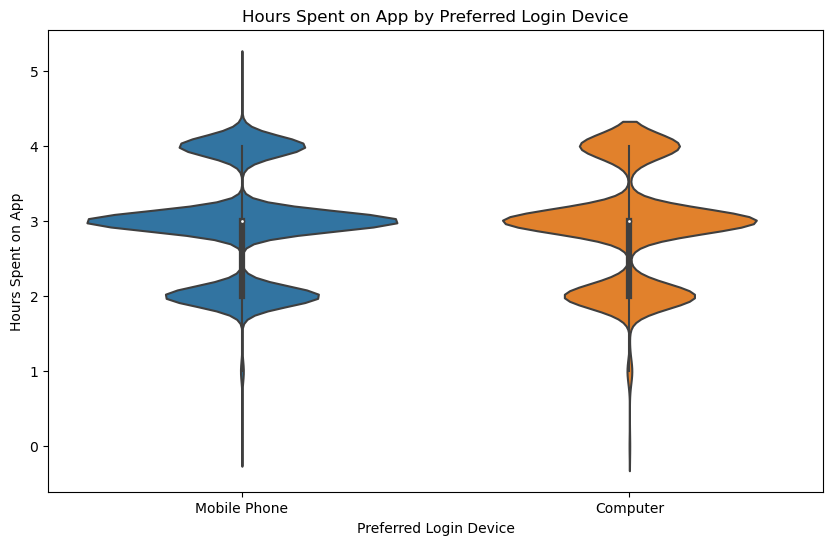

In [48]:
#How does the choice of preferred login device relate to the amount of time spent on the app? Is there a correlation between login device preference and app usage?
plt.figure(figsize=(10, 6))
sns.violinplot(x='PreferredLoginDevice', y='HourSpendOnApp', data=customer_behaviour_df)
plt.title('Hours Spent on App by Preferred Login Device')
plt.xlabel('Preferred Login Device')
plt.ylabel('Hours Spent on App')
plt.show()

From the shape of the mobile phone violin plot we observe that the shape of the violin stretch extends to the upper end of axis suggesting there are also, users that spend significantly more time on the app. The median is also situated in the lower end suggesting most users tend to be on the lower side of the app usage spectrum. 
The violin plot for the computer users also indicates that majority of the users spend the same amount of time on the app. However, computer users spread on the violin plot is more condensed suggesting less variability in comparison to the mobile users on the time spent on app.

From this we can conclude that both mobile phone and computer users average three hours on the app on a monthly basis and form a common pattern. However, there lies a difference in the spread and density distribution between the two groups. Mobile phone users display a wider range of behaviors, including instances of very high usage, which is less common in the computer users.

From our analysis on Customer Behavior and engagement we gain some valuable insights such that there does not seem to be a strong correlation between the hours spend on the app and order counts as, customer exhibits varied purchasing behaviors based on the visualization. Females were spending more time on the app in comparison to men and showed similar pattern of decrease in frequency as the number of order count increased. Both mobile phone and computer users were avergaing three hours on the app on monthly basis however, mobile users exhibited a wider range of behaviors. Based on the analysis of visualizations above we can strategically prioritize an efficient and user-friendly app design to target most users that prefer shorter interactions.  However, further statistical analysis is needed to understand customer demographics and prefrences and provide more evidence to either support or reject our infrences. 


**Customer Behavior and Engagement**

**Question-2.1: Are there any patterns forming between Preferred Order category and gender?**

Customer behavior and Engagemnet refers to the actions and decisions customers take when searching for, purchasing, using, and evaluating products or services. It encompasses a wide range of activities, including what customers buy, where they shop, how often they make purchases, the products or services they prefer, and the factors that influence their decisions.

Before moving on to the next question, let's familiarize ourselves with the variables we will be focusing on. We will analyze Preferred Order Category, Gender, and Marital Status. Let's examine the proportions of each category in our dataset.

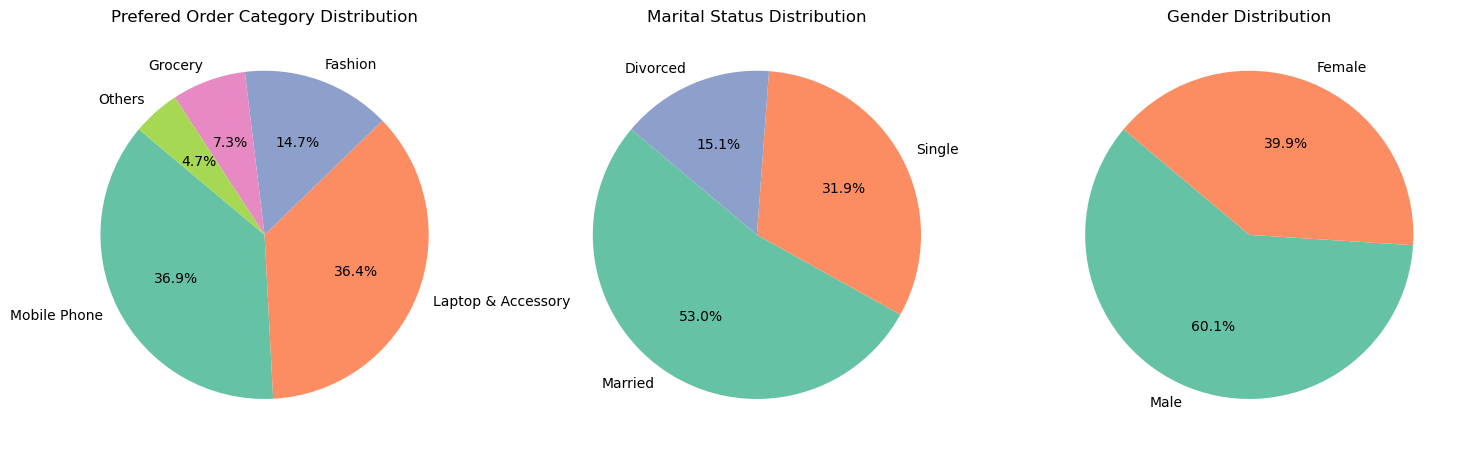

In [49]:
# Create subplots with 1 row and 3 columns
plt.figure(figsize=(18, 6))

preferred_order_cat_counts = customer_behaviour_df['PreferedOrderCat'].value_counts()
# Data and labels for PreferredOrderCat Pie Chart
order_labels = preferred_order_cat_counts.index
order_sizes = preferred_order_cat_counts.values
# Prefered Order Category Pie Chart
plt.subplot(1, 3, 1)
plt.pie(order_sizes, labels=order_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title('Prefered Order Category Distribution')

marital_counts = customer_behaviour_df['MaritalStatus'].value_counts()
# Data and labels for Marital Status Pie Chart
marital_labels = marital_counts.index
marital_sizes = marital_counts.values
# Marital Status Pie Chart
plt.subplot(1, 3, 2)
plt.pie(marital_sizes, labels=marital_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title('Marital Status Distribution')


gender_counts = customer_behaviour_df['Gender'].value_counts()
# Data and labels for Gender Pie Chart
gender_labels = gender_counts.index
gender_sizes = gender_counts.values
# Category Pie Chart
plt.subplot(1, 3, 3)
plt.pie(gender_sizes, labels=gender_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title('Gender Distribution')

plt.show()


The three pie charts above illustrate the distribution of unique categories within each variable. In the first chart, which represents Preferred Order Category, it becomes evident that "Mobile Phone" and "Laptop and Accessory" are the most preferred categories, accounting for nearly 70% of all orders. Following closely are Fashion, Grocery, and Other categories.

The second pie chart showcases the distribution of customers based on marital status (Married, Single, and Divorced). Notably, over 50% of the orders come from married individuals, followed by single individuals at approximately 31%, with the lowest contribution from divorced individuals.

The third pie chart displays the gender distribution. Males account for 60% of the orders, while females make up the remaining 40%.

Overall, The observed discrepancy in orders for Grocery and Fashion products among married individuals may be influenced by various factors. For example, married consumers might prioritize other categories due to household needs, or they may have different shopping habits and preferences. Further analysis and customer surveys could shed more light on the motivations behind this pattern. Additional research and soliciting customer feedback can offer deeper insights, allowing us to fine-tune our strategies for the purpose of elevating customer satisfaction and enhancing engagement.
  

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

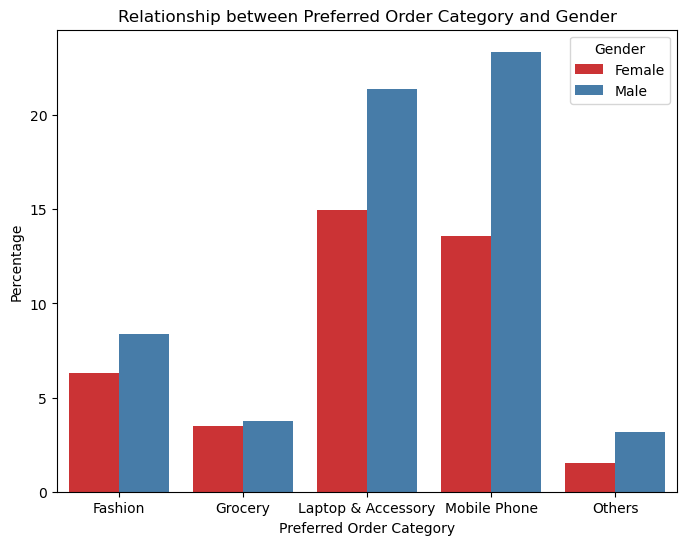

In [50]:
# Countplot (Bar plot)
# Calculate percentage values for each category
total_counts = customer_behaviour_df['PreferedOrderCat'].count()
gender_counts = customer_behaviour_df.groupby(['PreferedOrderCat', 'Gender']).size().reset_index(name='Counts')
gender_counts['Percentage'] = (gender_counts['Counts'] / total_counts) * 100

# Plot the barplot with percentage values
plt.figure(figsize=(8, 6))
sns.barplot(x='PreferedOrderCat', y='Percentage', hue='Gender', data=gender_counts, palette='Set1')
plt.xlabel("Preferred Order Category")
plt.ylabel("Percentage")
plt.title('Relationship between Preferred Order Category and Gender')
plt.show()

The bar plot demonstrates the correlation between gender and preferred order category. By representing the percentage of male and female users for different categories, we aimed to identify patterns. The analysis reveals similar ordering trends for both genders, yet males consistently outnumber females across all categories. This could be mainly because of the fact that about 60% of the totol consumers are male and only 40% is female.

Moreover, the data indicates that "Laptop and Accessory" and "Mobile Phone" together contribute to about half of the total market sales, highlighting their significant market presence.



**Question-2.2: Does the preferred order category have any correlation with marital status?**

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

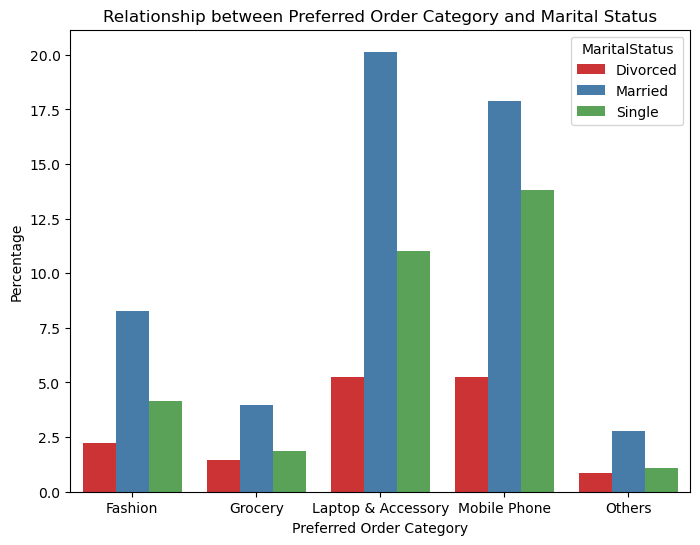

In [51]:
# Calculate percentage values for each category
total_counts = customer_behaviour_df['PreferedOrderCat'].count()
marital_counts = customer_behaviour_df.groupby(['PreferedOrderCat', 'MaritalStatus']).size().reset_index(name='Counts')
marital_counts['Percentage'] = (marital_counts['Counts'] / total_counts) * 100

# Plot the barplot with percentage values
plt.figure(figsize=(8, 6))
sns.barplot(x='PreferedOrderCat', y='Percentage', hue='MaritalStatus', data=marital_counts, palette='Set1')
plt.xlabel("Preferred Order Category")
plt.ylabel("Percentage")
plt.title('Relationship between Preferred Order Category and Marital Status')
plt.show()

The grouped bar chart above clearly indicates that married individuals engage in more shopping activities compared to those who are single or divorced. This could be attributed to the fact that married people make up around 50% of the total customer base. 

Additional information that can be inferred is, the prevailing trend continues to favor "Laptop and Accessories" and "Mobile Phone."

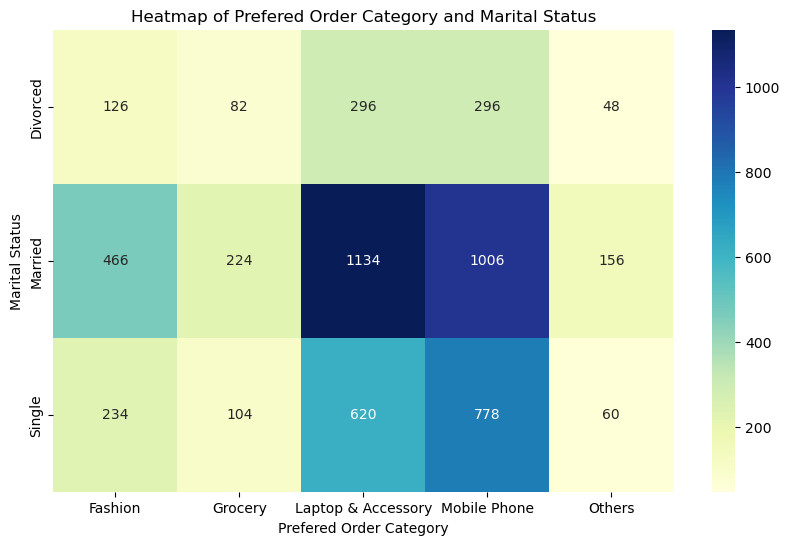

In [52]:
pivot_table = customer_behaviour_df.pivot_table(index='MaritalStatus', columns='PreferedOrderCat', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu',fmt='d')
plt.xlabel('Prefered Order Category')
plt.ylabel('Marital Status')
plt.title('Heatmap of Prefered Order Category and Marital Status')
plt.show()


The heatmap above provides a detailed view of the preferred order count for each category. The prominently highlighted blue columns in the heatmap's center indicate that "Laptop and Accessory" and "Mobile Phone" are the most favored orders among married individuals. Conversely, divorced individuals place the fewest orders in the "Other" category, and single people also show lower engagement with the "Others" category.

In [53]:
import plotly.express as px
fig = px.treemap(customer_behaviour_df, path=['PreferedOrderCat', 'MaritalStatus', 'Gender'])
fig.update_layout(title='Treemap Relationship between Prefered Order Category, Marital status and Gender', title_x=0.5)
fig.show()


The treemap above offers a structured perspective of our data, simplifying the identification of patterns like top-selling items. It encompasses all three categories, allowing us to visually grasp the proportion of each category's count in the dataset and determine specific customer segments to target. 

**Conclusion**:  The most preferred order categories remain consistent across all statuses and genders. In essence, our visualizations suggest that shopping preferences are not influenced by gender or marital status, challenging the conventional belief that shopping habits vary significantly between genders. It was particularly intriguing to visulaize that married individuals tend to place more orders for laptops, mobile phones, and accessories compared to their single counterparts.Again this may due to the fact that among total customers, 50% is married. Insights into real customer behavior are invaluable for marketing and advertising strategies, highlighting the importance of recognizing that people generally shop in a gender-neutral manner.

In light of these insights, to bolster the fashion and grocery sectors, businesses can consider a strategic approach. Expanding the product range within these sectors presents an opportunity to attract a broader customer base. Introducing new product lines, special promotions, and exclusive offerings can effectively entice customers. For instance, in the fashion sector, launching seasonal collections, sustainable clothing lines, or niche product categories could be a promising strategy. Additionally, seeking customer feedback and conducting surveys among those who have previously shopped in these sectors can provide invaluable insights for product selection, pricing, and enhancing the overall shopping experience. Furthermore, implementing loyalty programs and incentives for repeat purchases, such as rewards, discounts, and exclusive offers, can foster customer retention and encourage recurring orders.

**Question-3.1: Do we have any correlation with the number of orders and number of coupons?**

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



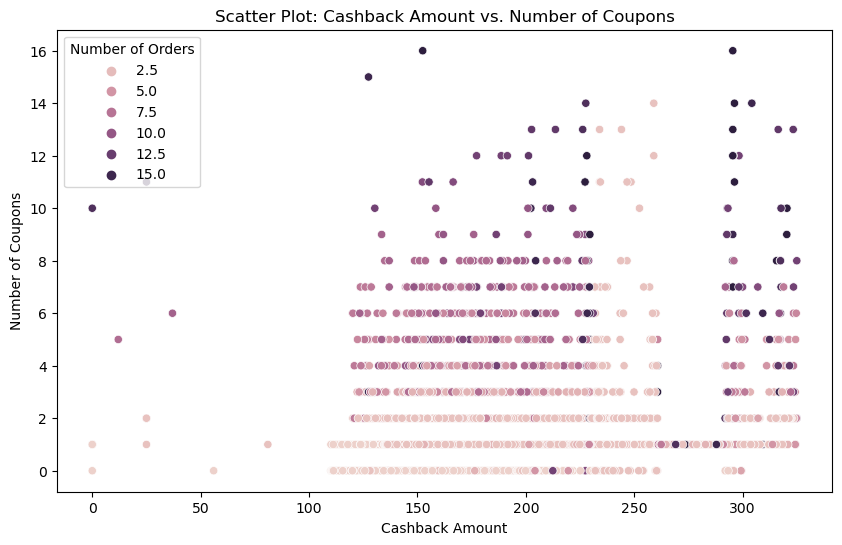

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_behaviour_df, x='CashbackAmount', y='CouponUsed', hue='OrderCount')
plt.title('Scatter Plot: Cashback Amount vs. Number of Coupons')
plt.xlabel('Cashback Amount')
plt.ylabel('Number of Coupons')
plt.legend(title='Number of Orders')
plt.show()

**Conclusion:** As per the above scatterplot, it is clearly evident that the number of order increases as we move to the right side of the plot wherein number of Coupons increases significantly. In a competitive e-commerce landscape, gaining insights into the impact of coupons can provide a competitive advantage. Businesses can differentiate themselves by offering more attractive incentives. The scatterplot clearly illustrates a positive correlation, where an increase in the number of coupons is associated with a higher number of orders. This suggests that coupons are an effective tool for encouraging customer purchases. This finding underscores the importance of a well-planned marketing strategy that includes the use of coupons. Businesses can consider increasing their coupon offerings or tailoring coupons to specific customer segments to boost sales.

**Question -3.2 Can we find any relationship between the number of orders and cashback amount received?**

In the dynamic landscape of e-commerce, understanding the intricate web of factors that influence customer behavior is pivotal for the success of online businesses. One of the most enticing and widely used mechanisms for enticing customers to make purchases is the provision of cashback incentives. Cashback, in essence, offers a direct monetary return to the customer for their purchases. This prompts a fundamental inquiry: can we identify a discernible relationship between the number of orders placed by customers and the CashbackAmount received?

The pursuit of this question is of significant importance for e-commerce businesses aiming to enhance their marketing strategies, retain customers, and maximize revenue. In this project, we embark on an exploration to unveil whether a connection exists between the number of orders and the CashbackAmount, a monetary incentive, customers receive. By shedding light on this relationship, we equip e-commerce platforms with valuable insights to refine their marketing and incentive strategies, ultimately fostering sustainable growth and a competitive edge in the digital marketplace.

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



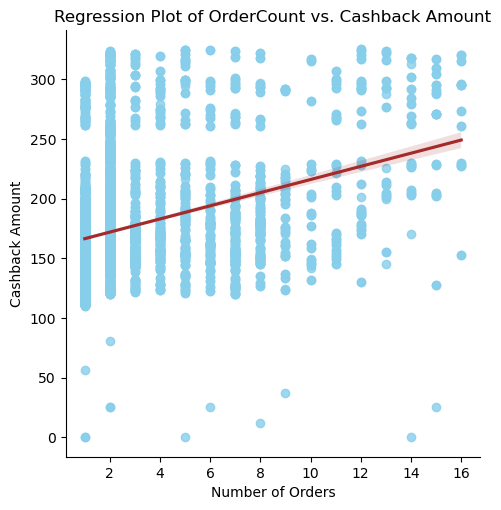

In [55]:
df_data = pd.DataFrame({'Number of Orders': customer_behaviour_df['OrderCount'], 'Cashback Amount': customer_behaviour_df['CashbackAmount']})

# Create a scatterplot with a regression line
sns.lmplot(x='Number of Orders', y='Cashback Amount', data=df_data, scatter_kws={'color':'skyblue'}, line_kws={'color':'brown'})
plt.title('Regression Plot of OrderCount vs. Cashback Amount')
plt.show()


**Conclusion:** Leveraging data-driven insights to understand the intricate relationship between two key variables, the number of orders and the CashbackAmount received, is paramount for e-commerce businesses. In our pursuit of illuminating this relationship, we turn to one of the most powerful data visualization tools at our disposal, the regression plot.

The regression plot analysis demonstrates a clear and direct relationship between the number of orders and the CashbackAmount received by customers on the e-commerce platform. This relationship suggests that as the number of orders increases, the CashbackAmount also increases proportionally. This insight has significant implications for our business, shedding light on how cashback incentives influence customer behavior.The regression line also serves as a predictive model. It allows us to estimate the CashbackAmount a customer is likely to receive based on the number of orders they place. This predictive power is invaluable for making data-driven decisions. It exemplifies the power of data-driven decision making. By analyzing the relationship between the number of orders and CashbackAmount, we can make informed choices regarding our cashback policies and marketing strategies.

Cashback incentives are not only associated with higher order volumes but also enhance customer engagement with the ecommerce platform. Customers perceive added value in these incentives, which can foster loyalty and repeat purchases. Further statistical tests can be conducted to quantify the strength of this relationship and provide even more precise insights.

**Let's investigate whether the combined effects of CouponUsage and CashbackAmount influence the OrderCount.**

In [56]:
import plotly.express as px
fig = px.scatter_3d(
    customer_behaviour_df,
    x='CouponUsed',
    y='CashbackAmount',
    z='OrderCount',
    color='OrderCount',  # Color points by OrderCount
    opacity=0.7,          # Set opacity for better visibility
    title='3D Scatter Plot: OrderCount vs. CouponUsed vs. CashbackAmount'
)

# Customize axis labels
fig.update_layout(scene=dict(xaxis_title='CouponUsed', yaxis_title='CashbackAmount', zaxis_title='OrderCount'))

# Show the plot
fig.show()

**Conclusion** The 3D scatter plot provides a comprehensive view of the interplay between CashbackAmount, CouponsCount, and OrderCount, offering insights into how these factors collectively influence customer behavior on our e-commerce platform. The plot highlights the positive relationships between these variables, revealing key patterns that can shape our business strategies.

The plot vividly illustrates the direct relationships between the three variables. As OrderCount increases, both CashbackAmount and CouponsCount tend to increase as well. This is a powerful indicator that our cashback and coupon strategies are effective in enticing customers to place more orders. This 3D perspective reveals segmentation opportunities. Customers exhibiting certain behaviors, such as placing a high number of orders, may be particularly responsive to cashback and coupons. We can tailor our marketing strategies to target and retain these customer segments.

CashbackAmount and CouponsCount are not just about boosting transactions, they also contribute to enhancing customer loyalty and repeated engagement with the platform. The 3D visual representation emphasizes the holistic impact of these incentives and effectiveness of these promotional tactics, motivating customers to not only order more frequently but also spend more. Further statistical analysis can be pursued to quantify the strength of these relationships and guide more precise strategies.

**Customer Churn and Retention**

A crucial aspect of this project involves assessing customer satisfaction with the e-commerce website and how it influences a customer's choice to remain loyal or switch to a competitor. Losing a customer to a rival can have a detrimental effect on the e-commerce website's business. Hence, ensuring customer retention is essential for the organization.

To conduct this analysis, it's imperative to comprehend the three key parameters that contribute to this situation, namely Satisfaction Score, Complaints, and Churn.

**Question-4.1: Satisfaction score**

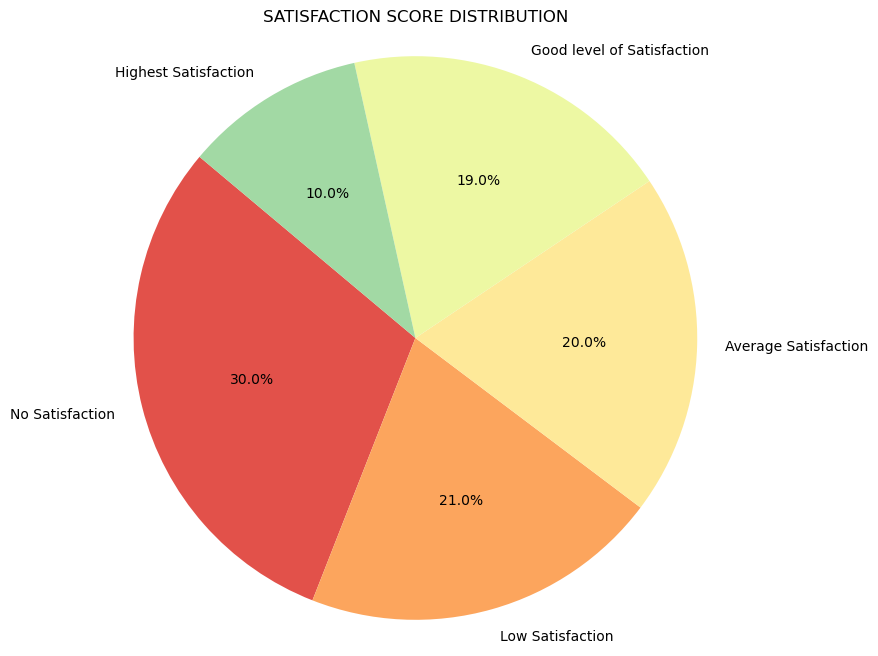

In [57]:
#define data for 1st pie of satisfaction score
data = customer_behaviour_df['SatisfactionScore'].value_counts()
labels = ['No Satisfaction', 'Low Satisfaction', 'Average Satisfaction','Good level of Satisfaction', 'Highest Satisfaction']
sizes = data.values

plt.figure(figsize=(8, 8))
sns.set_palette("Spectral")  # You can choose a different color palette.
plt.pie(sizes, labels=labels, autopct= lambda p: '{:.1f}%'.format(round(p)), startangle=140)
 
# Add a title to the chart.
plt.title('SATISFACTION SCORE DISTRIBUTION')

# Display the pie chart.
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

The data on customer satisfaction scores can be represented through a pie chart. This chart reveals that 10% of customers have a satisfaction score of 5, indicating the highest level of satisfaction. Conversely, 30% of customers exhibit the lowest level of satisfaction, with the average satisfaction level falling within the 20% range. This suggests the need to address the customer satisfaction parameter to enhance satisfaction levels, particularly as a larger concentration of customers falls within the lower satisfaction range.

**Question-4.2: Complaint and Churn rate**

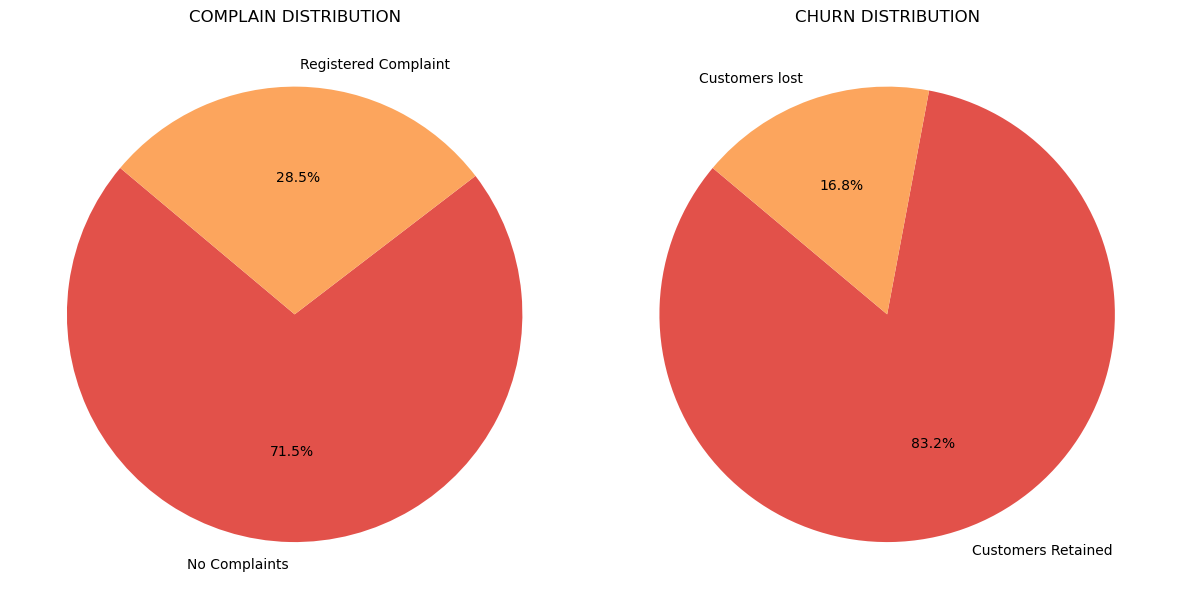

In [58]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#define data for 1st pie of Complain
data = customer_behaviour_df['Complain'].value_counts()
labels1 = ['No Complaints', 'Registered Complaint']
sizes1 = data.values
axes[0].pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=140)
axes[0].set_title('COMPLAIN DISTRIBUTION')

#define data for 2nd pie of Churn
data = customer_behaviour_df['Churn'].value_counts()
labels2 = ['Customers Retained', 'Customers lost'] # 0 as "Customer Retained" and 1 as "Customer Lost."
sizes2 = data.values
axes[1].pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=140)
axes[1].set_title('CHURN DISTRIBUTION')


sns.set_palette("Spectral")  # You can choose a different color palette.
plt.tight_layout()

# Display the pie chart.
plt.show()

In our analysis of registered complaints and customer churn rates, the pie charts provide valuable insights. Despite 28.5% of customers having lodged complaints, only 16.8% have chosen to depart, while a significant 83.2% of the customer base has been retained. This analysis suggests an important behavioral pattern: registering a complaint does not necessarily result in a customer leaving the e-commerce platform. It is highly likely that customer complaints were addressed effectively, contributing to a favorable retention rate.

**Question-4.3: What is the correlation of satisfaction score and complaints with the churn rate?**

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.

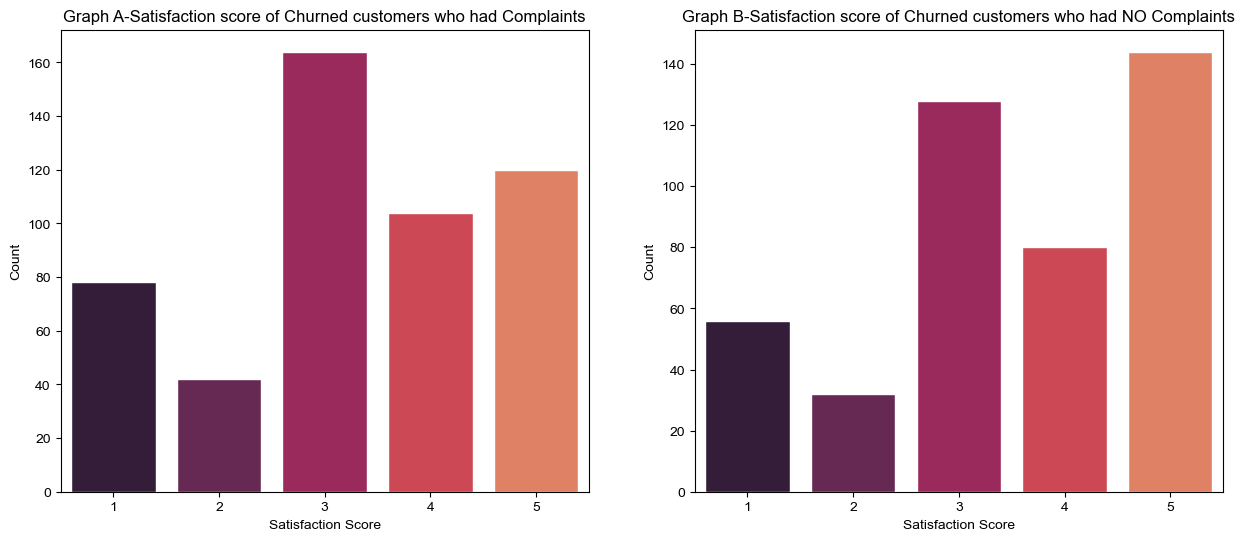

In [59]:
#SATISFACTION SCORES OF CUSTOMERS WHO HAD COMPLAINS AND WERE LOST TO COMPETITION
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

churned_customers_with_complaints = customer_behaviour_df[(customer_behaviour_df['Churn'] == 1) & (customer_behaviour_df['Complain'] == 1)]
churned_customers_without_complaints = customer_behaviour_df[(customer_behaviour_df['Churn'] == 1) & (customer_behaviour_df['Complain'] == 0)]

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a countplot or barplot to show the distribution of satisfaction scores
#plt.figure(figsize=(8, 6))
plt.rcParams["figure.figsize"] = (8,6)
sns.set_palette("rocket")  

#SATISFACTION SCORES OF CUSTOMERS WHO HAD COMPLAINS AND WERE LOST TO COMPETITION
sns.countplot(data=churned_customers_with_complaints, x='SatisfactionScore',ax=axes[0])

axes[0].set_title("Graph A-Satisfaction score of Churned customers who had Complaints")
axes[0].set_xlabel("Satisfaction Score")
axes[0].set_ylabel("Count")

#SATISFACTION SCORES OF CUSTOMERS WHO HAD NO COMPLAINS AND WERE LOST TO COMPETITION
sns.countplot(data=churned_customers_without_complaints, x='SatisfactionScore',ax=axes[1])
axes[1].set_title("Graph B-Satisfaction score of Churned customers who had NO Complaints")
axes[1].set_xlabel("Satisfaction Score")
axes[1].set_ylabel("Count")


# Show the plot
plt.show()

The aforementioned analysis sheds light on the guiding question: Does the level of customer satisfaction and the complaints they register correlate with their decision to churn from the e-commerce platform?

Graph A illustrates the customers who have raised complaints and subsequently churned. It's noteworthy that most of these customers fall within the average satisfaction bracket. One potential reason for their decision to churn might be a delay in or unsatisfactory resolution of their complaints. These are the customers who could potentially be retained by enhancing customer service.

Graph B, on the other hand, depicts customers who haven't registered any complaints and have a satisfaction score ranging from 3 to 5, indicating they are fairly satisfied. Nevertheless, they choose to churn from the e-commerce website. This decision might be attributed to factors such as finding better prices elsewhere or the unavailability of their desired products on our platform. To delve deeper into this issue, gathering the reasons for churn directly from the customers can be considered in future.

Hence, while customer satisfaction scores and complaints can be contributing factors in a customer's decision to churn, they are not the sole determinants. Other factors may also influence this decision, and future project scope could involve adding new survey questions to explore these additional factors contributing to churn.

**Customer Satisfaction and Feedback**

**Question-5: Does tenure have an impact on satisfaction scores and the number of complaints raised?**

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



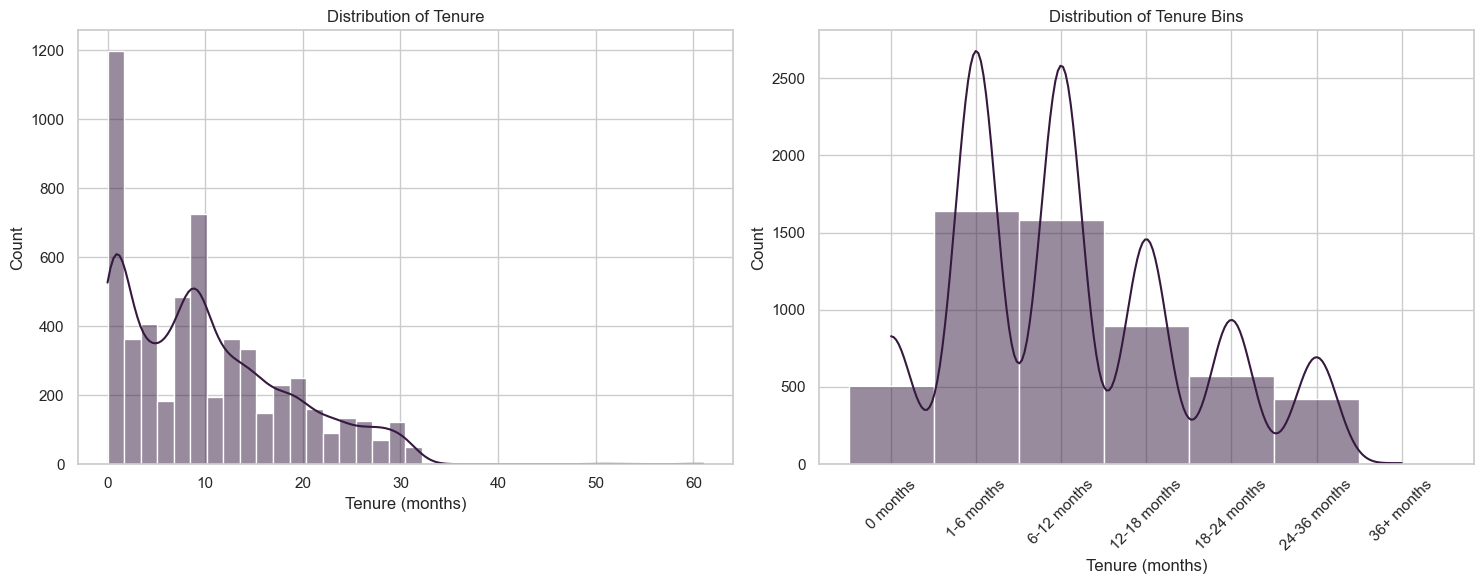

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
bins = [-1, 0, 6, 12, 18, 24, 36, float('inf')]
labels = ['0 months', '1-6 months', '6-12 months', '12-18 months', '18-24 months', '24-36 months', '36+ months']
customer_behaviour_df['Tenure_bins'] = pd.cut(customer_behaviour_df['Tenure'], bins=bins, labels=labels, right=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.histplot(customer_behaviour_df['Tenure'], bins=36, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Tenure')
axes[0].set_xlabel('Tenure (months)')

sns.histplot(customer_behaviour_df['Tenure_bins'], bins=len(labels), kde=True, ax=axes[1])
axes[1].set_title('Distribution of Tenure Bins')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xlabel('Tenure (months)')

plt.tight_layout()
plt.show()


Finally, let’s investigate if Tenure has an Impact on Satisfaction Scores or Complaints Raised

Taking a look at the distribution of tenure, we notice a pattern where a large majority of e-commerce customers seem to be newer members. Most customers have only been on the platform for less than a month. If we look at the distribution of tenure, separated by six month intervals, we can see most customers have been members for less than 12 months. Very few go beyond 36 months, however, this could be due to the recency of data collection.


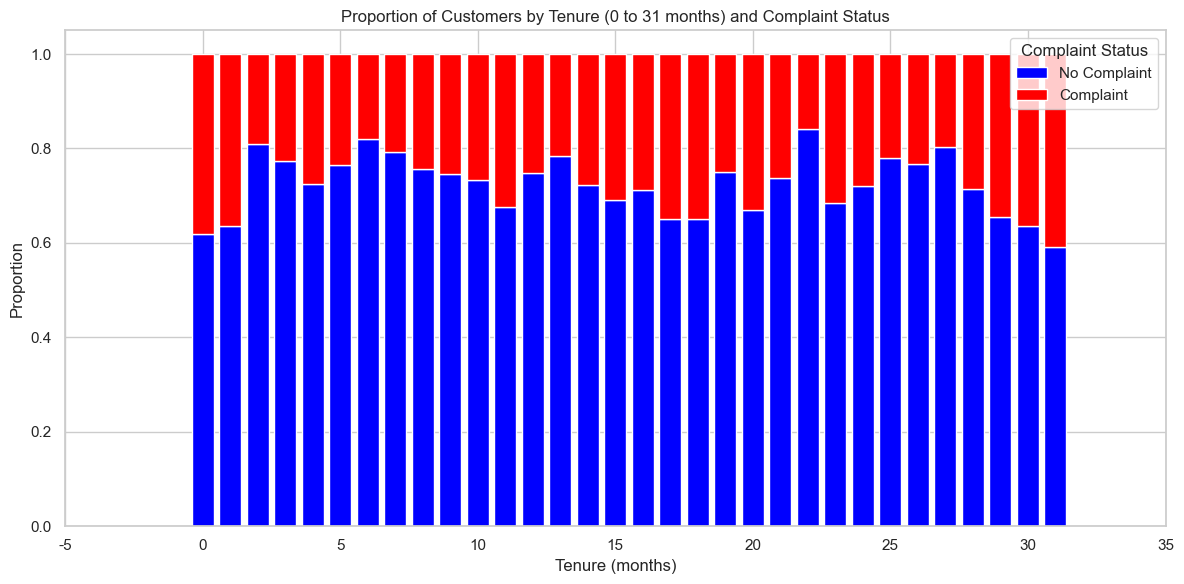

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

complain_palette = {0: "blue", 1: "red"}

filtered_df = customer_behaviour_df[customer_behaviour_df['Tenure'].between(0, 31)]

pivot = filtered_df.pivot_table(index='Tenure', columns='Complain', aggfunc='size').fillna(0)

pivot_proportions = pivot.divide(pivot.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))

bottom_proportion = pivot_proportions[0].tolist()
top_proportion = pivot_proportions[1].tolist()

plt.bar(pivot_proportions.index, bottom_proportion, color=complain_palette[0], label='No Complaint')
plt.bar(pivot_proportions.index, top_proportion, bottom=bottom_proportion, color=complain_palette[1], label='Complaint')

int_ticks = [int(tick) for tick in plt.gca().get_xticks()]
plt.xticks(ticks=plt.gca().get_xticks(), labels=int_ticks)

plt.legend(title="Complaint Status", loc="upper right")
plt.title('Proportion of Customers by Tenure (0 to 31 months) and Complaint Status')
plt.ylabel('Proportion')
plt.xlabel('Tenure (months)')

plt.tight_layout()
plt.show()


Here a bar graph has been implemented to compare a customer's complaint status with tenure. The key takeaway here are the proportions observed of customers without complaints vs customers with complaints with respect to tenure. From this visualization we can see that the rate of complaints in general is lower than no complaints. But interestingly, those who are most vocal are on the tails, meaning newer members and veteran members have higher proportions of complaints. The proportion of complaints of customers between the extremes show roughly similar proportions. 

/var/folders/8t/lfr89t450295kh3ql1sf502w0000gn/T/ipykernel_86140/3881599271.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/8t/lfr89t450295kh3ql1sf502w0000gn/T/ipykernel_86140/3881599271.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



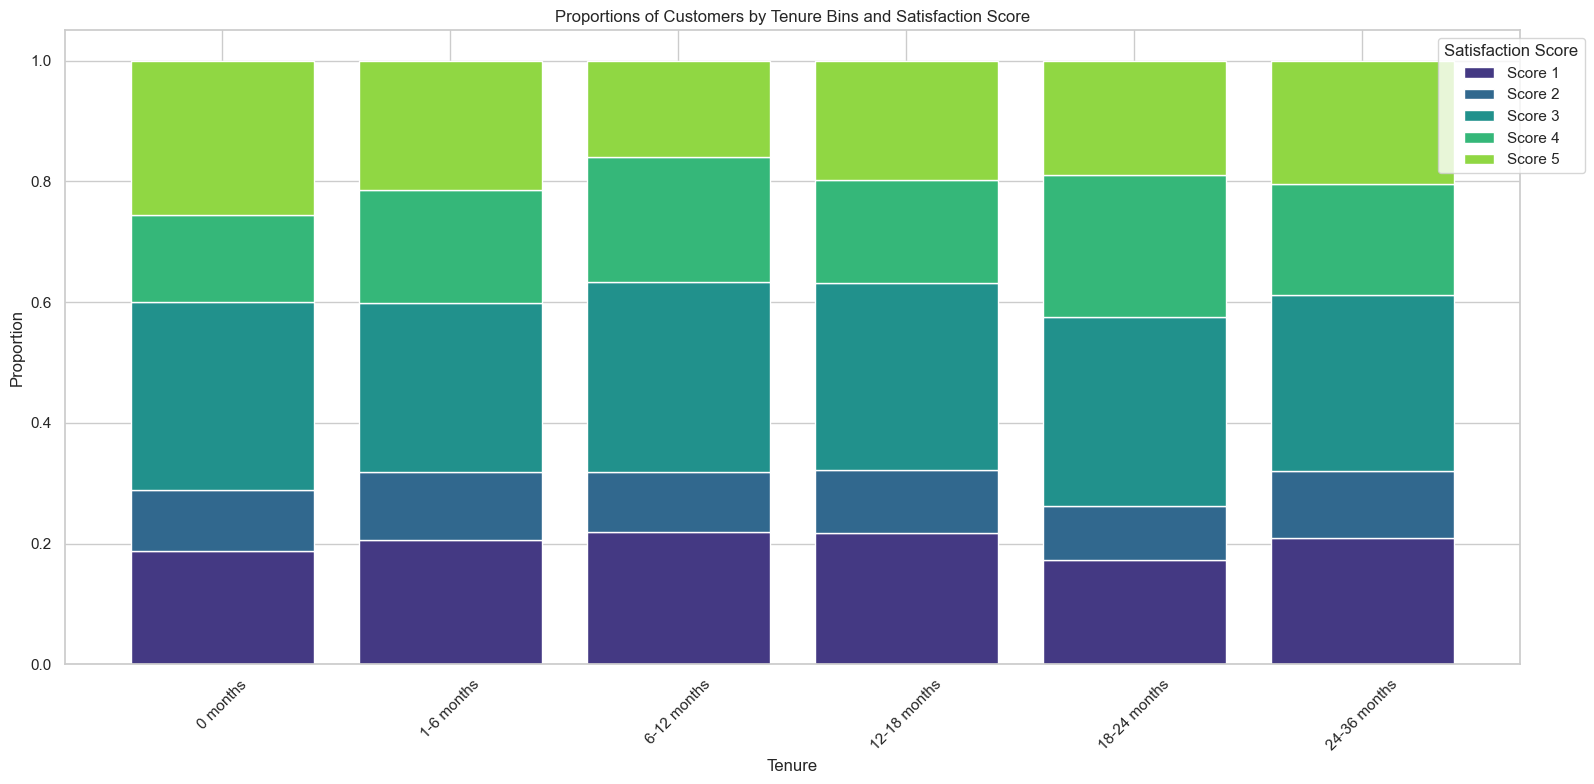

In [62]:
filtered_df = customer_behaviour_df[customer_behaviour_df['Tenure_bins'] != '36+ months']

total_per_bin = filtered_df.groupby('Tenure_bins').size()
counts = filtered_df.groupby(['Tenure_bins', 'SatisfactionScore']).size().unstack()
proportions = counts.divide(total_per_bin, axis=0)

plt.figure(figsize=(16, 8))

bottom = np.zeros(len(proportions))

for column in proportions.columns:
    plt.bar(proportions.index, proportions[column], bottom=bottom, label=f'Score {column}', color=sns.color_palette('viridis', n_colors=5)[column-1])
    bottom += proportions[column]

plt.xlabel("Tenure")
plt.ylabel("Proportion")
plt.title("Proportions of Customers by Tenure Bins and Satisfaction Score")
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Score', loc='upper right', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

Now to investigate the relationship between tenure and satisfaction scores, we divide tenure into different bins divided into 6 month intervals, starting at 0 months where each tenure bin displays the proportions of satisfaction scores, 1 being a low score and 5 being a high score. The purpose of this is to track rating patterns based on tenure. We noticed that in general, no matter what the tenure of a customer is, the patterns/proportions are roughly the same. We might be able to infer that customers who have been on the platform for less than a month are more generous with the 5 star reviews. We can also infer the most common score among all tenure bins is the average score of 3 and the least common is a score of 2. 

/var/folders/8t/lfr89t450295kh3ql1sf502w0000gn/T/ipykernel_86140/1179677915.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/8t/lfr89t450295kh3ql1sf502w0000gn/T/ipykernel_86140/1179677915.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/8t/lfr89t450295kh3ql1sf502w0000gn/T/ipykernel_86140/1179677915.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/8t/lfr89t450295kh3ql1sf50

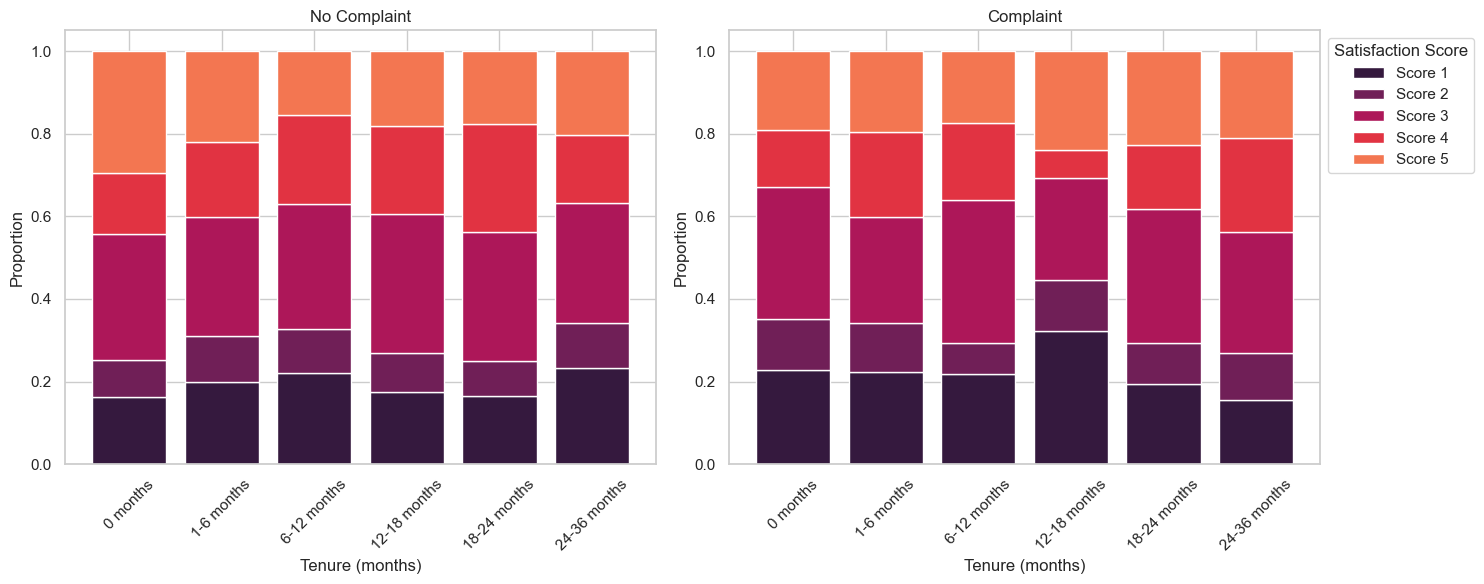

In [65]:
ig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

complaint_0 = customer_behaviour_df[customer_behaviour_df['Complain'] == 0]
complaint_1 = customer_behaviour_df[customer_behaviour_df['Complain'] == 1]

complaint_0 = complaint_0[complaint_0['Tenure_bins'] != '36+ months']
complaint_1 = complaint_1[complaint_1['Tenure_bins'] != '36+ months']

total_per_bin_0 = complaint_0.groupby('Tenure_bins').size()
counts_0 = complaint_0.groupby(['Tenure_bins', 'SatisfactionScore']).size().unstack()
proportions_0 = counts_0.divide(total_per_bin_0, axis=0)

total_per_bin_1 = complaint_1.groupby('Tenure_bins').size()
counts_1 = complaint_1.groupby(['Tenure_bins', 'SatisfactionScore']).size().unstack()
proportions_1 = counts_1.divide(total_per_bin_1, axis=0)

bottom_0 = np.zeros(len(proportions_0))
for column in proportions_0.columns:
    axes[0].bar(proportions_0.index, proportions_0[column], bottom=bottom_0, label=f'Score {column}')
    bottom_0 += proportions_0[column]
axes[0].set_title('No Complaint')
axes[0].set_xlabel('Tenure (months)')
axes[0].set_ylabel('Proportion')
axes[0].tick_params(axis='x', rotation=45)

bottom_1 = np.zeros(len(proportions_1))
for column in proportions_1.columns:
    axes[1].bar(proportions_1.index, proportions_1[column], bottom=bottom_1, label=f'Score {column}')
    bottom_1 += proportions_1[column]
axes[1].set_title('Complaint')
axes[1].set_xlabel('Tenure (months)')
axes[1].set_ylabel('Proportion')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Satisfaction Score', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In order to have a deeper understanding of the relationship between all three attributes, we have divided the same visualization in two, one showing customers without complaints and one with complaints. By doing this, we can determine if complaint status has any effect on one’s satisfaction score with respect to tenure. When comparing the two, we can infer that customers who have not filed a complaint tend to score higher (4 or 5), especially customers whose tenure has been more recent. We also notice that customers who have complained tend to have a higher proportion of giving a score of 1. Interestingly, the most veteran customers who have not complained seem to score lower than the veteran customers who have complained, which appears to be contrary to the observed trend. 

**Conclusion of the Report** 


In our exploration of customer behavior on our e-commerce platform, our analysis has unveiled valuable insights that can guide our business strategies. It is essential to emphasize that our conclusions are primarily drawn from visualizations, and to solidify these insights, conducting in-depth statistical analyses is a crucial next step. Here, we summarize the key takeaways from our visualizations:

**Customer Engagement and App Usage:**

We found that both mobile phone and computer users spend, on average, approximately three hours on our app each month. This insight provides a valuable baseline for user engagement metrics and helps us understand the time users invest in our platform.

**Customer Engagement and Preferred Order Category:**

Our visual analysis revealed that "Laptop and Accessories" as well as "Mobile Phones" are the most favored categories across all genders and marital statuses. This information will assist the marketing team in identifying the least popular categories, allowing them to focus their efforts on boosting sales in those areas.

**Coupons and Cashback Strategies:**

The relationship between the number of coupons and the number of orders is clearly evident. The scatterplot showcases a positive correlation, implying that coupons are effective in encouraging customer purchases. This observation underscores the importance of well-crafted marketing strategies that include the use of coupons. By tailoring coupons to specific customer segments and increasing their offerings, we can boost sales and customer engagement.


**Churn Factors and Customer Satisfaction:**

We discovered that customer satisfaction scores and complaint status are not the sole determinants of customer churn. Other factors likely influence customer behavior, demanding further investigation. We also observed that a customer's tenure does not significantly affect their satisfaction score, but there's a correlation indicating that newer and veteran members have a higher probability of raising complaints. These findings hint at opportunities for enhancing customer experience and retention.


**3D Scatter Plot Insights:**

Our 3D scatter plot masterfully illustrates the interplay between CashbackAmount, CouponsCount, and OrderCount. The plot illuminates direct and proportional relationships among these variables, underlining the efficacy of our cashback and coupon strategies. Additionally, this 3D perspective uncovers segmentation opportunities for tailoring marketing strategies to specific customer behaviors.


**Overall Summary:**

Our analysis underscores the importance of offering gender-neutral products to match customer preferences for a user-friendly environment. We've learned that customer benefits, such as coupons and cashback, play a pivotal role in encouraging customer orders and enhancing loyalty. Customer tenure does not significantly impact satisfaction scores, but tenure-based patterns reveal areas for improvement. Understanding these attributes equips us with insights for future visualizations and helps us strategize marketing efforts on our e-commerce platform.
In conclusion, our visual analysis has laid the foundation for data-driven decision-making, and further statistical analyses will provide more robust evidence to support our findings. Our findings demonstrate the potential for optimizing marketing strategies, enhancing customer engagement, and fostering long-term customer relationships in the competitive e-commerce landscape.


**References**

[1]Al Karim, R. (2013). Customer Satisfaction in Online Shopping: a study into the reasons for motivations and inhibitions. IOSR Journal of Business and Management, 11(6), 13-20.

[2]Arvai, Kevincommerce (2023, August 4). “K-mean Clustering in Python:  A Practical Guide.”https://realpython.com/k-means-clustering-python/

[3]Countants. (2020, January 5). Why consumer behavior analysis is so relevant to the ecommerce business? Medium https://medium.datadriveninvestor.com/why-consumer-behavior-analysis-is-so-relevant-to-the-ecommerce-business-8f49c250ca9c

[4]Dale, K. (2022). Data Visualization with Python and JavaScript. " O'Reilly Media, Inc.".

[5]“Data Cleansing.” Wikipedia, (n.d). https://en.wikipedia.org/w/index.php?title=Data_cleansing&oldid=1173211069.

[6] ‘Data visualization in python: overview, libraries & graphs | simplilearn’, Simplilearn.com. Available: https://www.simplilearn.com/tutorials/python-tutorial/data-visualization-in-python. [Accessed: Oct. 01, 2023]

[7]“Ecommerce - Canada: Statista Market Forecast.” Statista. (n.d). https://www.statista.com/outlook/dmo/ecommerce/canada.

[8]Hasslinger, A., Hodzic, S., & Opazo, C. (2008). Consumer behaviour in online shopping.

[9]Matplotlib. plot(x, y) - Matplotlib 3.8.0 documentation. (n.d.). https://matplotlib.org/stable/plot_types/basic/plot.html 

[10]Predoiu, O. (2023, September 21). Customer behavior analysis. Omniconvert Ecommerce Growth Blog. https://www.omniconvert.com/blog/customer-behavior-analysis/

[11]S. Burt and L. Sparks, ‘E-commerce and the retail process: a review’, Journal of Retailing and Consumer Services, vol. 10, no. 5, pp. 275–286, Sep. 2003, doi: 10.1016/S0969-6989(02)00062-0. Available: https://www.sciencedirect.com/science/article/pii/S0969698902000620. [Accessed: Oct. 02, 2023]

[12]Verma, Ankit.(2023, July 6). “E-commerce Dataset.” (CC BY-NC-SA 4.0) creativecommon.org  https://creativecommons.org/licenses/by-nc-sa/4.0/

[13]Verma,(2021, January 26) A. Ecommerce customer churn analysis and prediction. Kaggle. https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

[14]Zanzana, Salim, and Jessica Martin. (2023, February 21). Retail e-commerce and COVID-19: How online sales evolved as in-person shopping resumed. https://www150.statcan.gc.ca/n1/pub/11-621-m/11-621-m2023002-eng.htm.






 
